In [1]:
import sys
sys.executable

'D:\\anaconda3\\python.exe'

In [2]:
from timeit import Timer
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 验证list按索引取值是O(1)的。
# list的长度分别是10,0000一直到100,0000。测试的函数是一次取、存。可以用matplotlib来展示数据。
def get_from_list(lst, v):
    a = lst[v]

times = []
for i in range(100000, 1000000, 10000):
    lst = list(range(i))
    v = random.randint(0, i-1)
    t1 = Timer("get_from_list(lst, v)", "from __main__ import get_from_list, lst, v")
    times.append(t1.timeit(10000))

# visualize the times
time_arr = np.asarray(times)
len_arr = np.asarray(list(range(100000, 1000000, 10000)))
plt.scatter(len_arr, time_arr)
plt.ylim((0,0.01))
plt.show()

In [ ]:
# 验证dict的set item和get item都是O(1)的。
# dict的keys数量分别是10,0000一直到100,0000。测试的函数是一次取、存。可以用matplotlib来展示数据。
def get_from_dict(input_dict, k):
    a = input_dict[k]

def set_to_dict(input_dict, k):
    input_dict[k] = 0

get_times = []
set_times = []
for i in range(100000, 1000000, 10000):
    test_dict = {}
    keys = [str(j) for j in list(range(i))]
    for key in keys:
        test_dict[key] = int(key)
    
    v = str(random.randint(0, i-1))
    t1 = Timer("get_from_dict(test_dict, v)", "from __main__ import get_from_dict, test_dict, v")
    get_times.append(t1.timeit(1000))

    t2 = Timer("set_to_dict(test_dict, v)", "from __main__ import set_to_dict, test_dict, v")
    set_times.append(t2.timeit(1000))

In [ ]:
# visualize the times
len_arr = np.asarray(list(range(100000, 1000000, 10000)))
plt.subplot(1, 2, 1)
time_1_arr = np.asarray(get_times)
plt.scatter(len_arr, time_1_arr)
plt.title("get time display")
plt.ylim((0,0.01))

plt.subplot(1, 2, 2)
time_2_arr = np.asarray(set_times)
plt.scatter(len_arr, time_2_arr)
plt.title("set time display")
plt.ylim((0,0.01))

plt.tight_layout()
plt.show()

In [ ]:
# 对比list和dict的delete操作符: 每一次释放其中前2000个
def del_from_list(input_list):
    for i in range(2000):
        del input_list[i]

def del_from_dict(input_dict):
    for i in range(2000):
        del input_dict[str(i)]

list_times = []
dict_times = []
for i in range(100000, 1000000, 10000):
    test_dict = {}
    keys = [str(j) for j in list(range(i))]
    for key in keys:
        test_dict[key] = int(key)
    
    test_lst = list(range(i))
    t1 = Timer("del_from_list(test_lst)", "from __main__ import del_from_list, test_lst")
    list_times.append(t1.timeit(1))

    t2 = Timer("del_from_dict(test_dict)", "from __main__ import del_from_dict, test_dict")
    dict_times.append(t2.timeit(1))

ratios = [list_times[i]/dict_times[i] for i in range(len(list_times))]

In [ ]:
# 预测：根据wiki python, del list[i]是O(n)，del dict[k]是O(1)。所以我预测比例是接近一次直线
# visualize the ratios
r_arr = np.asarray(ratios)
len_arr = np.asarray(list(range(100000, 1000000, 10000)))
plt.scatter(len_arr, r_arr)
# plt.ylim((0,2000))
plt.show()

In [12]:
# [H2.4]做计时实验，通过对一些随机数列表排序，验证Python自带的list.sort的时间复杂度为O(n logn)
def sort_list(lst):
    lst.sort()

sort_times = []
for i in range(10000, 100000, 1000):
    test_lst = [random.randint(0, i-1) for _ in list(range(i))]
    t1 = Timer("sort_list(test_lst)", "from __main__ import sort_list, test_lst")
    sort_times.append(t1.timeit(1000))

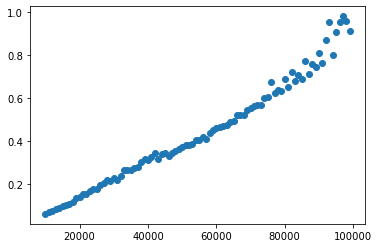

In [27]:
# visualize the times
time_arr = np.asarray(sort_times)
len_arr = np.asarray(list(range(10000, 100000, 1000)))
plt.scatter(len_arr, time_arr)
# plt.ylim((0,0.01))
plt.show()